## İmporting Library

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

## Loaded Data

In [2]:
advertising = pd.read_csv("Advertising.csv")
df = advertising.copy()
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## Visulation

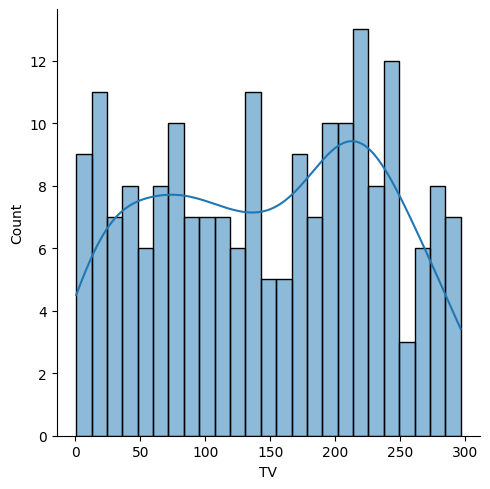

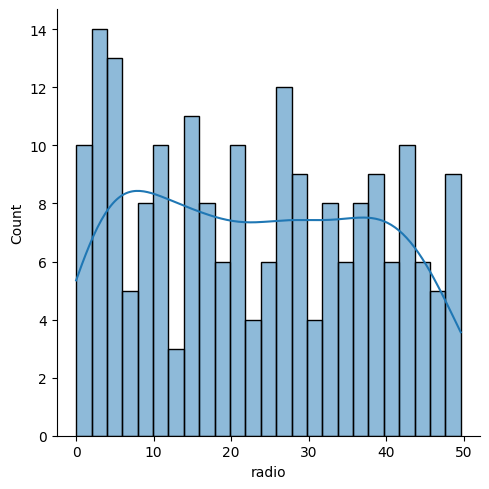

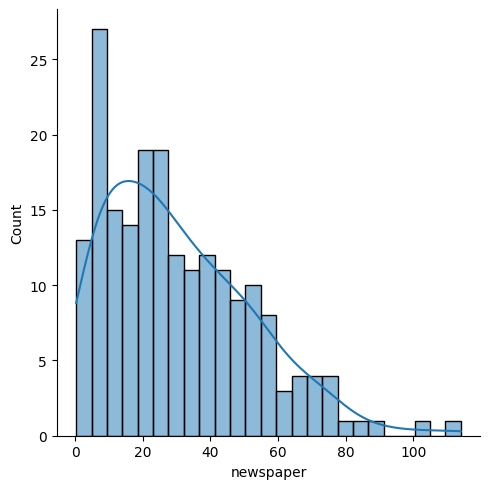

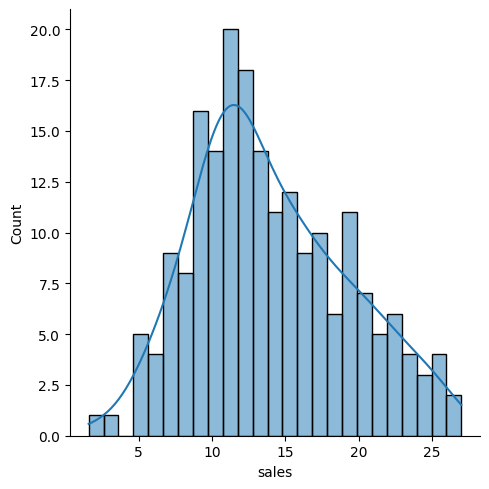

In [3]:
for i in df :
    sns.displot(df[i] , bins = 25 , kde = True )

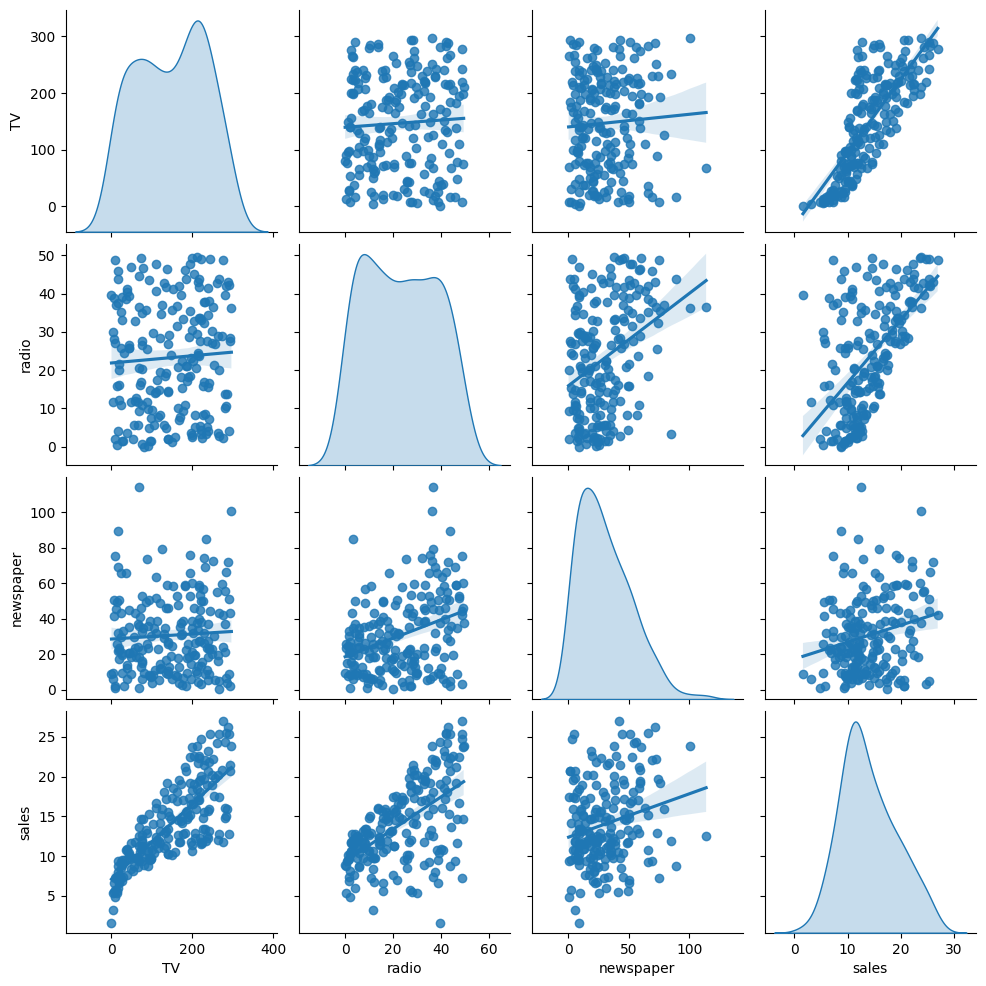

In [4]:
sns.pairplot(df , kind = "reg" , diag_kind = "kde" )

<Axes: >

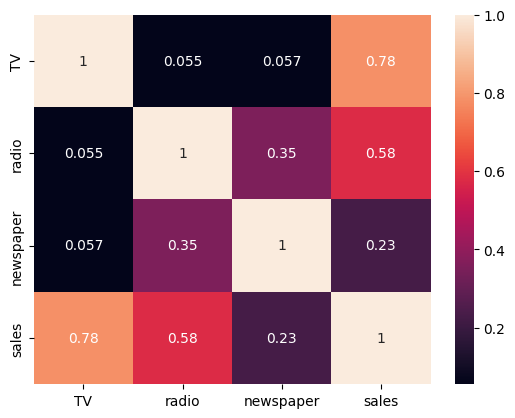

In [5]:
sns.heatmap(df.corr() , annot = True)

## Train | Test Split

In [6]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.linear_model import LinearRegression

x = df.drop("sales" , axis = 1)
y = df.sales

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=61)

lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

## Model Evaluation 
- Linear Regression

In [7]:
from sklearn.metrics import mean_absolute_error ,r2_score , mean_squared_error

y_pred = lr.predict(x_test)

r2 = r2_score(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr.predict(x_test)))

In [8]:
print("r2 : " , {r2} , "," , 
      "mae : " , {mae} , "," ,
      "mse : "  , {mse} , "," ,
      "rmse : ", {rmse})

r2 :  {0.8801295028531632} , mae :  {1.1380825268425534} , mse :  {2.004411521278403} , rmse :  {1.4157724115402175}


## Cross_Vall_Score

In [9]:
cross_val_score(lr, x_train, y_train, cv = 5, scoring = "r2").mean()

0.872578377060848

In [10]:
y_pred =np.array(y_pred)

<Axes: ylabel='sales'>

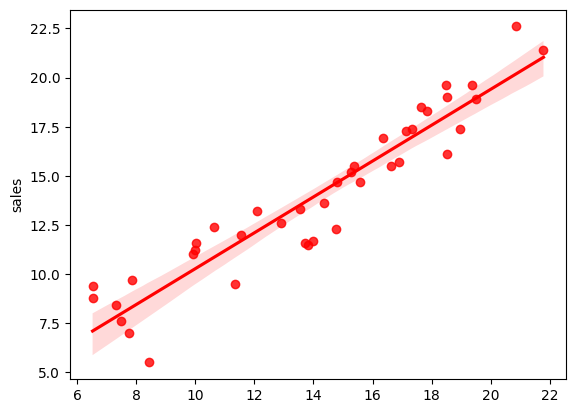

In [11]:
sns.regplot(data = df , x = y_pred, y = y_test , color = "red")